# 📘 Notebook – Fonctions de Clustering et de Prédiction

Ce notebook regroupe les **fonctions utilisées pour le clustering et la prédiction** de la consommation énergétique à partir de données de température et de consommation.

- 📂 Les **chemins des fichiers** (datasets, modèles, etc.) sont définis dans le fichier `files.py`.
- 🧩 Les **fonctions de traitement** (extraction, concaténation, prétraitement, etc.) sont définies dans `fonctions.py`.

Ce document permet de **documenter brièvement chaque fonction**

# <span style="color:red;">🔧 Fonctions:</span>

## <span style="color:orange;"> **extract_and_concat_consommation**</span> :

<span style="color:blue;">**Utilité**</span> :  
Extrait une colonne de consommation (chauffage ou climatisation) pour une ville principale (`toulouse`, `seville` ou `zurich`) et ses périphéries, puis les concatène dans un seul DataFrame.

<span style="color:blue;">**Paramètres** </span> :  
- `ville_principale` : nom de la ville principale (`"toulouse"`, `"seville"` ou `"zurich"`).
- `column_index` : index de la colonne à extraire :
  - `4` pour le chauffage
  - `5` pour la climatisation
- `prefix` : préfixe utilisé pour nommer le DataFrame final (ex. `consommation_heat_` → `consommation_heat_toulouse`).
  
<span style="color:blue;">**Retour** </span> :   
Un DataFrame contenant les colonnes concaténées des fichiers de la ville principale et ses périphéries, accessible par le nom suivant :  
`consommation_` + `heat` ou `cool` + `_` + `ville_principale` (par exemple, `consommation_heat_toulouse` ou `consommation_cool_seville`).

## <span style="color:orange;"> **extract_and_combine_all**</span> :  


<span style="color:blue;">**Utilité**</span> :  
Cette fonction crée des DataFrames de données météorologiques pour chaque groupe de villes, en combinant les données de la ville principale et ses périphéries. Les colonnes extraites comprennent les informations suivantes :
- "Text_" : colonne 1
- "Hum_" : colonne 3
- "Wind_" : colonne 4
- "Solar_" : colonne 5
- "Ground_" : colonne 10

<span style="color:blue;">**Paramètres**</span> :  
- `ville_principale` : nom de la ville principale (`"toulouse"`, `"seville"` ou `"zurich"`).
- `prefix` :column du  préfixe utilisé dans le csv initial  pour former des df monovarier les DataFrames (ex. `Text_`, `Hum_`, `Wind_`, etc.).

<span style="color:blue;">**Retour**</span> :  
Des DataFrames sont créés avec un nom comme `Text_combined_villeprincipale` pour chaque type de donnée (par exemple, `Text_combined_toulouse`, `Hum_combined_seville`, etc.). Ces DataFrames combinent les données des villes principales et de leurs périphéries.



## <span style="color:orange;">**clustering_par_partie**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction permet de diviser les données de consommation énergétique en parties égales selon le nombre de partitions (`n_parts`). ⚠️ Si `n_parts = 1`, le clustering est effectué sur l'ensemble de la journée (sans partitionnement). Sinon, l'algorithme de clustering est appliqué sur chaque partie de la journée. 


<span style="color:blue;">**Paramètres**</span> :  
- `df` : DataFrame avec 24 colonnes horaires (0 à 23) représentant les données horaires sur une journée.
- `n_parts` : Nombre de parties dans lesquelles diviser la journée (1 = pas de partition, autrement il y a plusieurs parties à analyser).
- `status_column` : Colonne indiquant si le chauffage est activé (valeur de 1 pour activé, 0 pour non activé).
- `n_clusters_list` : Liste du nombre de clusters à appliquer pour chaque partie. La taille de la liste doit être égale à `n_parts` et chaque valeur correspond au nombre de clusters pour chaque partie (exemple : `[3]` pour une seule partition, `[3, 2]` pour deux partitions).

<span style="color:blue;">**Retour**</span> :  
Un DataFrame avec les résultats du clustering appliqué à chaque partie de la journée. 
Un DataFrame avec les résultats du clustering appliqué à chaque partie de la journée. Les colonnes de clustering sont de la forme clusters_ + numéro de partition. ⚠️ Si aucune partition n'est utilisée, la colonne sera nommée clusters_1

## <span style="color:orange;">**add_profil_and_status**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction permet d'ajouter la colonne `status_col` ainsi que les colonnes de profils `profil_cols` de `conso_df` à `input_df`. Elle est utilisée pour enrichir un DataFrame de base avec les résultats du clustering (par exemple, le statut de chauffage et les profils de consommation).

<span style="color:blue;">**Paramètres**</span> :  
- `input_df` : DataFrame de base, tel que `Text_combined_toulouse`.
- `conso_df` : DataFrame résultant du clustering, tel que `clustering_heat_toulouse`.
- `status_col` : Colonne indiquant le statut (par défaut `heat_on`).
- `profil_cols` : Une chaîne (ex. `"clusters_1"`) ou une liste (ex. `["clusters_1", "clusters_2", ...]`) des colonnes de profil à ajouter.  
  ⚠️  : Même si vous avez une seule colonne, elle doit être incluse dans une liste.

<span style="color:blue;">**Retour**</span> :  
Un DataFrame contenant les colonnes ajoutées du statut et des profils Par exemple, les colonnes `"heat_on"`, `"clusters_1"`, `"clusters_2"`, etc., seront ajoutées à `input_df`.



## <span style="color:orange;"> **concat_and_create_final_df**</span>

<span style="color:blue;">**Utilité**</span> :  
Concatène plusieurs DataFrames (identifiés par leurs préfixes) pour une ville donnée, afin de former une **entrée multivariée** destinée à un modèle de prédiction.

<span style="color:blue;">**Paramètres**</span> :  
- `city` : nom de la ville principale (ex. `"toulouse"`, `"seville"` ou `"zurich"`).
- `prefixes` : liste des préfixes des DataFrames à concaténer (ex. `["Text", "Solar", "Ground"]`).

<span style="color:blue;">**Retour**</span> :  
Un DataFrame multivarié, résultat de la concaténation des différents DataFrames selon les préfixes fournis.

⚠️ **Le nom du DataFrame final est automatiquement généré** selon la structure :  
`{prefix1}_{prefix2}_..._combined_{city}`  Par exemple : **Text_Solar_Ground_combined_toulouse**




## <span style="color:orange;"> **evaluate_models_split**</span>

<span style="color:blue;">**Utilité**</span> :  
Cette fonction évalue plusieurs modèles de machine learning supervisé en appliquant un split manuel des données (80% pour l'entraînement par défaut). Elle peut être utilisée pour des tâches de classification multi-label ou multi-class selon que les données sont partitionnées ou non.

<span style="color:blue;">**Modèles utilisés** :</span>
 **Random Forest** , **Logistic Regression** , **SVM**, **KNN** ,**Gradient Boosting** 

<span style="color:blue;">**Paramètres** :</span>
- `target_cols` : Liste des colonnes cibles. Si elle contient plusieurs colonnes, c'est un problème de **multi-label**.
- `split_ratio` : Un nombre entre 1 et 10, indiquant le ratio de division des données pour l'entraînement. Par exemple, `split_ratio=8` signifie que 80% des données sont utilisées pour l'entraînement et 20% pour le test.

<span style="color:blue;">**Retour** :</span>  
- Un dictionnaire contenant les métriques de performance pour chaque modèle.
- Un DataFrame avec les vraies valeurs et les prédictions du modèle.

<span style="color:blue;">**Prédictions** :</span>  
- Si les jours sont partitionnés, la fonction effectuera des prédictions **multi-label**.
- Si les jours ne sont pas partitionnés, la fonction effectuera des prédictions **multi-class**.
  
  ⚠️Si des prédictions **multi-label** sont effectuées, il faut fournir en paramètre `models2` au lieu de `models`.






## <span style="color:orange;"> **preprocess_data**</span>

<span style="color:blue;">**Utilité**</span> :  
Prépare les données pour l'entraînement d'un modèle **LSTM de prédiction de consommation énergétique sur 24 heures**.

<span style="color:blue;">**Détails du traitement**</span> :  
- L’**équilibrage** de la classe majoritaire est effectué **uniquement sur les jours prédits** (à t),  
  et **pas sur les jours passés** (à t-1) utilisés comme entrée du modèle.
- La **prédiction** est basée sur :
  - les différentes données d’entrée (ex. température, humidité, etc.) à **t-1**,
  - la consommation réelle à t-1,
  - les profils réels à t-1,
  - les données d’entrée à t et les profils prédits à t.

<span style="color:blue;">**Paramètres**</span> :
- `Text_combined` : DataFrame des données d’entrée,résultat de la fonction   
  - `extract_and_combine_all` (input **monovarié**),  
  - ou `concat_and_create_final_df` (input **multivarié**).
- `clustering_heat` : DataFrame contenant les clusters, généré par la fonction `clustering`.
- `Test_Text_heat` : DataFrame de la **partie test** contenant les **profils reel et  prédits**, généré par `evaluate_models_split`.
- `name_combined` : ⚠️⚠️⚠️ doit être de la forme `input_combined_villeprincipale`,  par exemple **Text_combined_toulouse**, utilisé pour savoir si les **jours sont partitionnés ou non**.




In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [2]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")



In [3]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2,   
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)


In [4]:
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du profil de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Évaluation de Random Forest...


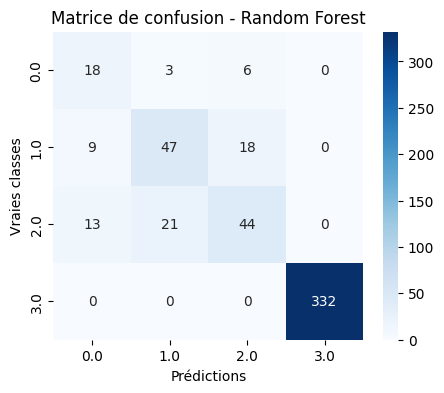

Random Forest - F1: 0.8640 - Accuracy: 0.8630 - Temps: 0.97s
###################################################################

Évaluation de Logistic Regression...


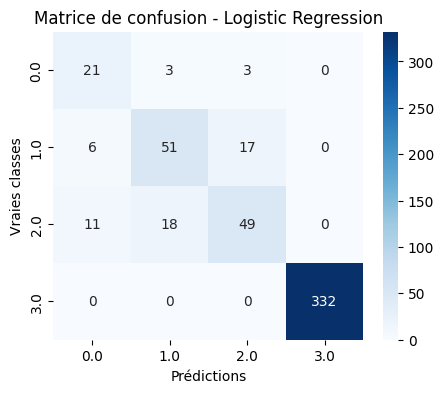

Logistic Regression - F1: 0.8868 - Accuracy: 0.8865 - Temps: 0.70s
###################################################################

Évaluation de SVC...


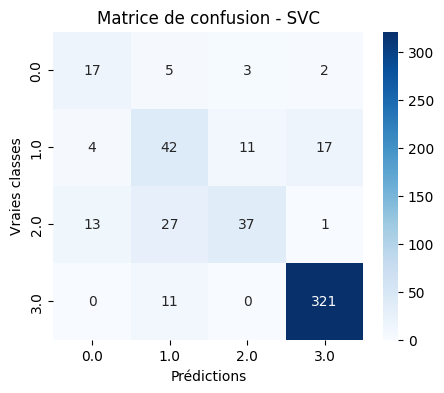

SVC - F1: 0.8133 - Accuracy: 0.8160 - Temps: 0.19s
###################################################################

Évaluation de KNN...


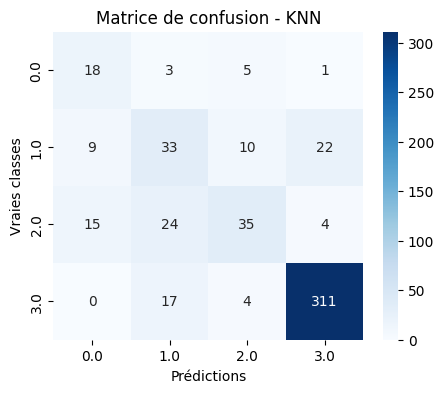

KNN - F1: 0.7750 - Accuracy: 0.7769 - Temps: 0.10s
###################################################################

Évaluation de Gradient Boosting...


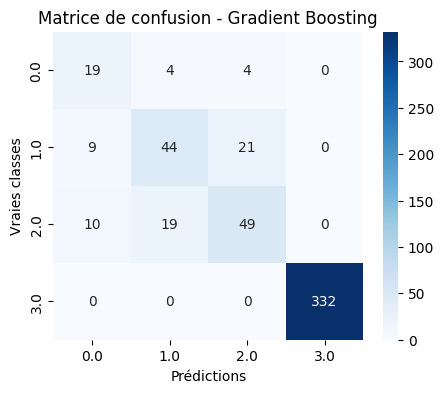

Gradient Boosting - F1: 0.8694 - Accuracy: 0.8689 - Temps: 9.24s
###################################################################
	
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prédiction du 24 heures de consommation de chauffage
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Prediction based on : Text


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.9348 - mae: 0.7022 - mse: 0.9348 - val_loss: 0.3985 - val_mae: 0.4069 - val_mse: 0.3985
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4588 - mae: 0.4169 - mse: 0.4588 - val_loss: 0.2986 - val_mae: 0.2952 - val_mse: 0.2986
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3641 - mae: 0.3542 - mse: 0.3641 - val_loss: 0.2671 - val_mae: 0.2841 - val_mse: 0.2671
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3479 - mae: 0.3356 - mse: 0.3479 - val_loss: 0.2380 - val_mae: 0.2663 - val_mse: 0.2380
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2973 - mae: 0.3234 - mse: 0.2973 - val_loss: 0.2140 - val_mae: 0.2552 - val_mse: 0.2140
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2702 - mae: 0.3052 - mse: 0.2702 - val_loss: 0.1990 - val_mae: 0.2493 - val_mse: 0.1990
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2281 - mae: 0.2841 - mse: 0.2281 - val_loss

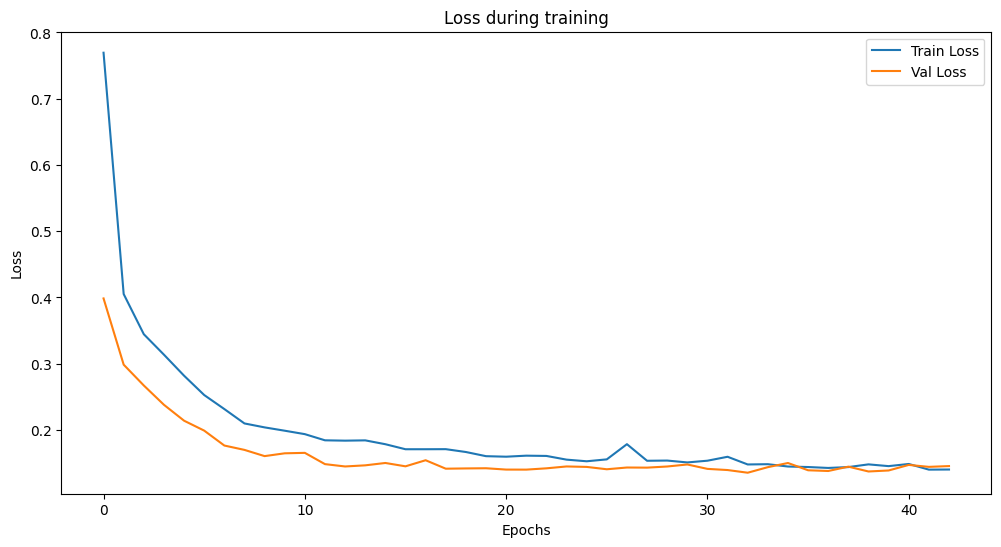

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1136 - mae: 0.1721 - mse: 0.1136
Validation Loss : 0.13546441495418549
Validation MAE: 0.18340441584587097
Validation MSE: 0.13546441495418549
Validation RMSE: 0.36805490752628944
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test MAE: 140.03957804296428
Test MSE: 64449.1093364272
Test RMSE: 253.86829131742152
Test R²: 0.8667927290227545
Test CVRMSE: 0.5552786000673575


In [6]:

clustering_heat_toulouse = clustering(
    df=consommation_chauffage,  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)


Text_conso_heat_tou = add_profil_and_status(
    input_df=Text_combined,
    conso_df=clustering_heat_toulouse,
    status_col="heat_on",
    profil_cols=["clusters_1"]
)
print("-"*100)
print("-"*100)
print("Prédiction du profil de consommation de chauffage")
print("-"*100)
print("-"*100)


re, Test_Text_heat_toulouse = evaluate_models_split(
    df=Text_conso_heat_tou,
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)

print("\t")
print("-"*100)
print("-"*100)
print("Prédiction du 24 heures de consommation de chauffage")
print("-"*100)
print("-"*100)

X_train2, X_test2, y_train2, y_test2 , scaler_temp, scaler_cons  = preprocess_data(
    Text_combined,
    clustering_heat_toulouse,
    Test_Text_heat_toulouse,
    "Text_combined_toulouse"
)

model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_temp, 
    scaler_cons
)
  

In [ ]:
import plotly.graph_objects as go

def plot_true_vs_predicted_interactive(indices, y_test, predictions, scaler_cons):
    """
    Affiche un graphique interactif comparant les valeurs réelles et prédites pour plusieurs jours de test.
    """
    true_total = []
    pred_total = []
    x_ticks = []
    labels = []

    for i, idx in enumerate(indices):
        conso_reel = scaler_cons.inverse_transform(y_test[idx].reshape(1, -1))
        conso_pred = scaler_cons.inverse_transform(predictions[idx].reshape(1, -1))
        true_total.extend(conso_reel.flatten())
        pred_total.extend(conso_pred.flatten())
        x_ticks.extend(list(range(i * 24, (i + 1) * 24)))
        labels.extend([f"Jour {i+1} - h{j}" for j in range(24)])

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x_ticks,
        y=true_total,
        mode='lines+markers',
        name='Valeurs Réelles',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=x_ticks,
        y=pred_total,
        mode='lines+markers',
        name='Prédictions',
        line=dict(color='orange')
    ))

    # Ajout des lignes verticales entre les jours
    for i in range(1, len(indices)):
        fig.add_vline(x=i * 24, line=dict(color='gray', dash='dash'), opacity=0.3)

    fig.update_layout(
        title="Valeurs Réelles vs Prédictions (Interactif)",
        xaxis_title="Temps (heures concaténées)",
        yaxis_title="Consommation de chauffage",
        hovermode="x unified",
        xaxis=dict(tickmode='array', tickvals=x_ticks[::4], ticktext=labels[::4]),
        legend=dict(x=0.01, y=0.99)
    )

    fig.show()


In [ ]:
plot_true_vs_predicted_interactive(indices=[0, 1, 2], y_test=y_test2, predictions=predictions2, scaler_cons=scaler_cons)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def create_line_gif_point_by_point(y_test, predictions, scaler_cons, filename="line_point_by_point.gif", num_examples=4):
    """
    Crée un GIF où, pour chaque exemple, les points vrais et prédits apparaissent un à un en ligne.
    """
    num_examples = min(num_examples, len(y_test), len(predictions))
    y_test_rescaled = scaler_cons.inverse_transform(y_test[:num_examples])
    predictions_rescaled = scaler_cons.inverse_transform(predictions[:num_examples])

    fig, ax = plt.subplots(figsize=(10, 6))

    # Total frames = num_examples * length_of_each_series
    length = y_test_rescaled.shape[1]
    total_frames = num_examples * length

    def update(frame):
        ax.clear()

        # Quel exemple on trace ?
        example_idx = frame // length
        point_idx = frame % length

        y_true = y_test_rescaled[example_idx][:point_idx + 1]
        y_pred = predictions_rescaled[example_idx][:point_idx + 1]
        indices = np.arange(point_idx + 1)

        ax.plot(indices, y_true, marker='o', color='blue', label="Valeurs réelles", linestyle='-')
        ax.plot(indices, y_pred, marker='x', color='orange', label="Prédictions", linestyle='--')

        ax.set_ylabel("Consommation")
        ax.set_xlabel("Heures")
        ax.set_title(f"Exemple {example_idx + 1} - Point {point_idx + 1} sur {length}")
        ax.set_xticks(np.arange(length))
        ax.set_xticklabels([f"Heure {j}" for j in range(length)], rotation=45)
        ax.legend()
        ax.grid(True, linestyle="--", alpha=0.4)
        y_max = max(y_test_rescaled[example_idx].max(), predictions_rescaled[example_idx].max())
        ax.set_ylim(0, y_max * 1.1)

    ani = animation.FuncAnimation(fig, update, frames=total_frames, repeat=False)
    ani.save(filename, writer='pillow', fps=2)  # fps=2 pour voir doucement
    plt.close()


In [33]:
create_line_gif_point_by_point(y_test2, predictions2, scaler_cons)
